In [38]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
import pandas as pd


root_dir1 = '/Users/sharanyu/Desktop/AI_FINAL_GITHUB_SHARANYU/data stats/d1'
root_dir2 = '/Users/sharanyu/Desktop/AI_FINAL_GITHUB_SHARANYU/data stats/d2/Flower Classification V2/V2/Training Data'
root_dir3 = '/Users/sharanyu/Desktop/AI_FINAL_GITHUB_SHARANYU/data stats/d3'


In [39]:

def search_directory(directory):
    ImageList=[]
    subdirs = [directory]
    while subdirs:
        subdir = subdirs.pop()
        for filename in os.listdir(subdir):
            file_path = os.path.join(subdir, filename)
            if os.path.isfile(file_path):
                if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                    ImageList.append(file_path)
            elif os.path.isdir(file_path):
                subdirs.append(file_path)
    return ImageList


Total images per dataset

In [66]:

images1 = search_directory(root_dir1)
images2 = search_directory(root_dir2)
images3 = search_directory(root_dir3)

print(len(images1))
print(len(images2))
print(len(images3))

images1 = [f for f in images1 if not f.startswith('.DS_Store')]
images2 = [f for f in images2 if not f.startswith('.DS_Store')]
images3 = [f for f in images3 if not f.startswith('.DS_Store')]

filepaths1 = images1
filepaths2 = images2
filepaths3 = images3

8000
15000
15740


File formats found in datasets

In [41]:
import os
file_formats = {}

for file in images1:
    file_extension = os.path.splitext(file)[1]

    if file_extension in file_formats:
        file_formats[file_extension] += 1
    else:
        file_formats[file_extension] = 1

print("File formats found in directory for dataset1:")
for file_format, count in file_formats.items():
    print(f"{file_format}: {count}")

file_formats = {}

for file in images2:
    file_extension = os.path.splitext(file)[1]

    if file_extension in file_formats:
        file_formats[file_extension] += 1
    else:
        file_formats[file_extension] = 1

print("File formats found in directory for dataset2:")
for file_format, count in file_formats.items():
    print(f"{file_format}: {count}")

file_formats = {}

for file in images3:
    file_extension = os.path.splitext(file)[1]

    if file_extension in file_formats:
        file_formats[file_extension] += 1
    else:
        file_formats[file_extension] = 1

print("File formats found in directory for dataset3:")
for file_format, count in file_formats.items():
    print(f"{file_format}: {count}")


File formats found in directory for dataset1:
.jpg: 7463
.jpeg: 234
.png: 303
File formats found in directory for dataset2:
.jpeg: 14996
.png: 4
File formats found in directory for dataset3:
.jpg: 15740


Average dimension of images in dataset

In [42]:
sum_width = 0
sum_height = 0
count = 0
avg_size = [] 

def size(images):
    global sum_width, sum_height, count
    for filename in images:
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            with Image.open(filename) as img:
                width, height = img.size
                file_size = os.path.getsize(filename)
                sum_width += width
                sum_height += height
                avg_size.append(file_size/1024)
                count += 1

size1 = size(images1)
avg_width = sum_width / count
avg_height = sum_height / count
total = 0
for i in avg_size:
    total+=i
total = total/len(avg_size)

print("Average file size in Dataset1 in kb:",total)

print(f"The average size of the images in Dataset1 is: {avg_width} x {avg_height}")

sum_width = 0
sum_height = 0
count = 0
avg_size = [] 

size1 = size(images2)
avg_width = sum_width / count
avg_height = sum_height / count
total = 0
for i in avg_size:
    total+=i
total = total/len(avg_size)

print("Average file size in Dataset2 in kb:",total)

print(f"The average size of the images in Dataset2 is: {avg_width} x {avg_height}")

sum_width = 0
sum_height = 0
count = 0
avg_size = [] 

size1 = size(images3)
avg_width = sum_width / count
avg_height = sum_height / count
total = 0
for i in avg_size:
    total+=i
total = total/len(avg_size)

print("Average file size in Dataset3 in kb:",total)

print(f"The average size of the images in Dataset3 is: {avg_width} x {avg_height}")

Average file size in Dataset1 in kb: 63.49321618652344
The average size of the images in Dataset1 is: 453.726125 x 379.03775
Average file size in Dataset2 in kb: 10.182355924479166
The average size of the images in Dataset2 is: 239.76693333333333 x 213.20346666666666
Average file size in Dataset3 in kb: 14.798693490906926
The average size of the images in Dataset3 is: 288.7774459974587 x 276.59313850063535


General Standard deviation of images 

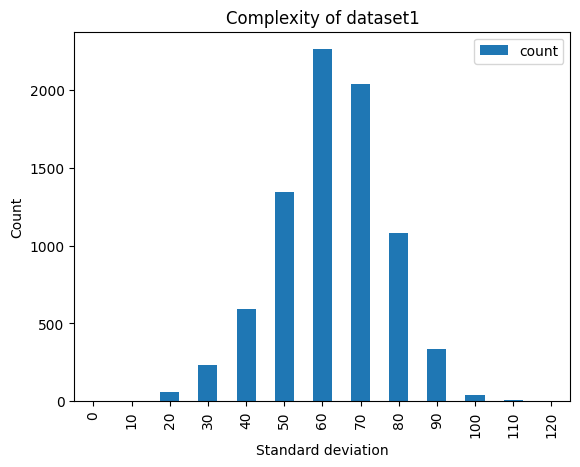

avg std  67.40002361447773
                                     count
standard deviation range - dataset1       
0                                        1
10                                       4
20                                      61
30                                     232
40                                     593
50                                    1344
60                                    2263
70                                    2038
80                                    1080
90                                     335
100                                     40
110                                      7
120                                      1


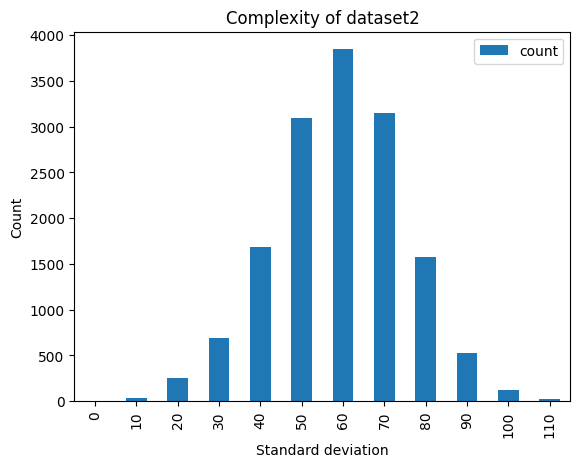

avg std  64.20410614328058
                                     count
standard deviation range - dataset2       
0                                        2
10                                      36
20                                     257
30                                     691
40                                    1684
50                                    3093
60                                    3844
70                                    3143
80                                    1574
90                                     527
100                                    126
110                                     23


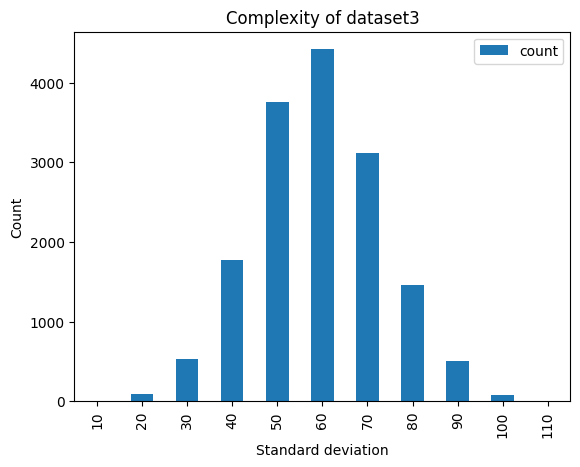

avg std  64.14803834151662
                                     count
standard deviation range - dataset3       
10                                       9
20                                      85
30                                     533
40                                    1768
50                                    3758
60                                    4419
70                                    3114
80                                    1460
90                                     506
100                                     83
110                                      5


In [43]:
import numpy as np
import cv2
import os
import pandas as pd

images = images1
total = 0
bin_counts = {}

for i in images:
    img = cv2.imread(i)
    if img is not None:
        std_dev = np.std(img)
        total += std_dev
        bin_index = int(std_dev // 10) * 10
        if bin_index in bin_counts:
            bin_counts[bin_index] += 1
        else:
            bin_counts[bin_index] = 1

df = pd.DataFrame.from_dict(bin_counts, orient='index', columns=['count'])
df.index.name = 'standard deviation range - dataset1'
df = df.sort_index()
ax = df.plot(kind='bar', legend=True)
ax.set_xlabel('Standard deviation')
ax.set_ylabel('Count')
ax.set_title('Complexity of dataset1')
plt.show()

print("avg std ",total/len(images))

print(df)

images = images2
total = 0
bin_counts = {}

for i in images:
    img = cv2.imread(i)
    if img is not None:
        std_dev = np.std(img)
        total += std_dev
        bin_index = int(std_dev // 10) * 10
        if bin_index in bin_counts:
            bin_counts[bin_index] += 1
        else:
            bin_counts[bin_index] = 1

df = pd.DataFrame.from_dict(bin_counts, orient='index', columns=['count'])
df.index.name = 'standard deviation range - dataset2'
df = df.sort_index()
ax = df.plot(kind='bar', legend=True)
ax.set_xlabel('Standard deviation')
ax.set_ylabel('Count')
ax.set_title('Complexity of dataset2')
plt.show()

print("avg std ",total/len(images))

print(df)

images = images3
total = 0
bin_counts = {}

for i in images:
    img = cv2.imread(i)
    if img is not None:
        std_dev = np.std(img)
        total += std_dev
        bin_index = int(std_dev // 10) * 10
        if bin_index in bin_counts:
            bin_counts[bin_index] += 1
        else:
            bin_counts[bin_index] = 1

df = pd.DataFrame.from_dict(bin_counts, orient='index', columns=['count'])
df.index.name = 'standard deviation range - dataset3'
df = df.sort_index()
ax = df.plot(kind='bar', legend=True)
ax.set_xlabel('Standard deviation')
ax.set_ylabel('Count')
ax.set_title('Complexity of dataset3')
plt.show()

print("avg std ",total/len(images))

print(df)

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

path1 = root_dir1
class_names1 = os.listdir(path1)
class_names1 = [i.lower() for i in class_names1]

class_names1.remove('.ds_store')
print(class_names1)

std_devs1 = []
for class_name in class_names1:
    class_path1 = os.path.join(path1, class_name)
    try:
        images1 = os.listdir(class_path1)
    except Exception as e:
        continue
    image_arrays1 = []
    for image in images1:
        try:
            img1= plt.imread(os.path.join(class_path1, image))
        except Exception as e:
            continue
        img_resized1= resize(img1, (256, 256, 3))
        image_arrays1.append(img_resized1)
    image_arrays1 = np.array(image_arrays1)
    std_dev1 = np.std(image_arrays1)
    std_devs1.append(std_dev1)

['daisy', 'lotus', 'tulip', 'dandelion', 'sunflower']


In [45]:
print(len(class_names1))
print(len(std_devs1))

5
5


In [46]:
path2 = root_dir2
class_names2 = os.listdir(path2)
class_names2 = [i.lower() for i in class_names2]

class_names2.remove('.ds_store')
print(class_names2)

std_devs2 = []
for class_name in class_names2:
    class_path2 = os.path.join(path2, class_name)
    try:
        images2 = os.listdir(class_path2)
    except Exception as e:
        continue
    image_arrays2 = []
    for image in images2:
        try:
            img2= plt.imread(os.path.join(class_path2, image))
        except Exception as e:
            continue
        img_resized2= resize(img2, (256, 256, 3)) # resize the image to a fixed size
        image_arrays2.append(img_resized2)
    image_arrays2 = np.array(image_arrays2)
    std_dev2 = np.std(image_arrays2)
    std_devs2.append(std_dev2)


['lavender', 'marigold', 'daisy', 'iris', 'aster', 'rose', 'lily', 'poppy', 'orchid', 'sunflower']


In [47]:
print(len(class_names2))
print(len(std_devs2))

10
10


In [48]:
path3 = root_dir3
class_names3 = os.listdir(path3)
class_names3 = [i.lower() for i in class_names3]

class_names3.remove('.ds_store')
print(class_names3)

std_devs3 = []
for class_name in class_names3:
    class_path3 = os.path.join(path3, class_name)
    try:
        images3 = os.listdir(class_path3)
    except Exception as e:
        continue
    image_arrays3 = []
    for image in images3:
        try:
            img3= plt.imread(os.path.join(class_path3, image))
        except Exception as e:
            continue
        img_resized3= resize(img3, (256, 256, 3)) # resize the image to a fixed size
        image_arrays3.append(img_resized3)
    image_arrays3 = np.array(image_arrays3)
    std_dev3 = np.std(image_arrays3)
    std_devs3.append(std_dev3)

['calendula', 'bellflower', 'iris', 'astilbe', 'common_daisy', 'california_poppy', 'carnation', 'rose', 'tulip', 'black_eyed_susan', 'coreopsis', 'dandelion', 'water_lily', 'magnolia', 'sunflower', 'daffodil']


In [49]:
print(len(class_names3))
print(len(std_devs3))

16
16


In [50]:
class_names = class_names1+class_names2+class_names3
class_names=list(set(class_names))
print(class_names,len(class_names))

['iris', 'lotus', 'orchid', 'aster', 'marigold', 'rose', 'astilbe', 'lavender', 'daisy', 'dandelion', 'black_eyed_susan', 'coreopsis', 'calendula', 'tulip', 'poppy', 'water_lily', 'california_poppy', 'sunflower', 'magnolia', 'daffodil', 'common_daisy', 'carnation', 'lily', 'bellflower'] 24


In [51]:
class_names=sorted(class_names)

In [52]:
len(std_devs1)
class_names1=list(class_names1)

std_devs1_temp  = std_devs1+[0 for i in range((len(class_names)-len(std_devs1)))]

for i in class_names:
    if i not in class_names1:
        class_names1.append(i)
        
print(std_devs1_temp,len(std_devs1_temp))
print(class_names1)

[0.33594972093313497, 0.30349491535060086, 0.3118633467438893, 0.29158127226179203, 0.3250910017173099, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 24
['daisy', 'lotus', 'tulip', 'dandelion', 'sunflower', 'aster', 'astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'iris', 'lavender', 'lily', 'magnolia', 'marigold', 'orchid', 'poppy', 'rose', 'water_lily']


In [53]:
std_devs2_temp  = std_devs2+[0 for i in range((len(class_names)-len(std_devs2)))]


for i in class_names:
    if i not in class_names2:
        class_names2.append(i)

print(std_devs2_temp,len(std_devs2_temp))
print(class_names2)

[0.28707684813481504, 0.3489909386711186, 0.3276562716999899, 0.33115911324313574, 0.3002144806387412, 0.35851930989322506, 0.3437339878308211, 0.30901230234376864, 0.34703149591203464, 0.325088878981679, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 24
['lavender', 'marigold', 'daisy', 'iris', 'aster', 'rose', 'lily', 'poppy', 'orchid', 'sunflower', 'astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'dandelion', 'lotus', 'magnolia', 'tulip', 'water_lily']


In [54]:
std_devs3_temp  = std_devs3+[0 for i in range((len(class_names)-len(std_devs3)))]

for i in class_names:
    if i not in class_names3:
        class_names3.append(i)
print(std_devs3_temp,len(std_devs3_temp))
print(class_names3,len(class_names3))


[0.2957679534873601, 0.2623837703600184, 0.2644298018317626, 0.2572623712097638, 0.2958854405863869, 0.27700508478099917, 0.30565761057905994, 0.28815166511255924, 0.2844526110385125, 0.2960138275763742, 0.2869756741227817, 0.26886852721934157, 0.2592104679414678, 0.2852267184010138, 0.3225550963435862, 0.2856040467724315, 0, 0, 0, 0, 0, 0, 0, 0] 24
['calendula', 'bellflower', 'iris', 'astilbe', 'common_daisy', 'california_poppy', 'carnation', 'rose', 'tulip', 'black_eyed_susan', 'coreopsis', 'dandelion', 'water_lily', 'magnolia', 'sunflower', 'daffodil', 'aster', 'daisy', 'lavender', 'lily', 'lotus', 'marigold', 'orchid', 'poppy'] 24


In [55]:
zipped = zip(class_names1, std_devs1_temp)

sorted_zip = sorted(zipped)

class_names1, std_devs1_temp = zip(*sorted_zip)


In [56]:
zipped = zip(class_names2, std_devs2_temp)

sorted_zip = sorted(zipped)

class_names2, std_devs2_temp = zip(*sorted_zip)

In [57]:
zipped = zip(class_names3, std_devs3_temp)

sorted_zip = sorted(zipped)

class_names3, std_devs3_temp = zip(*sorted_zip)

In [58]:
print(class_names1)
print(class_names2)
print(class_names3)

('aster', 'astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'daisy', 'dandelion', 'iris', 'lavender', 'lily', 'lotus', 'magnolia', 'marigold', 'orchid', 'poppy', 'rose', 'sunflower', 'tulip', 'water_lily')
('aster', 'astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'daisy', 'dandelion', 'iris', 'lavender', 'lily', 'lotus', 'magnolia', 'marigold', 'orchid', 'poppy', 'rose', 'sunflower', 'tulip', 'water_lily')
('aster', 'astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'daisy', 'dandelion', 'iris', 'lavender', 'lily', 'lotus', 'magnolia', 'marigold', 'orchid', 'poppy', 'rose', 'sunflower', 'tulip', 'water_lily')


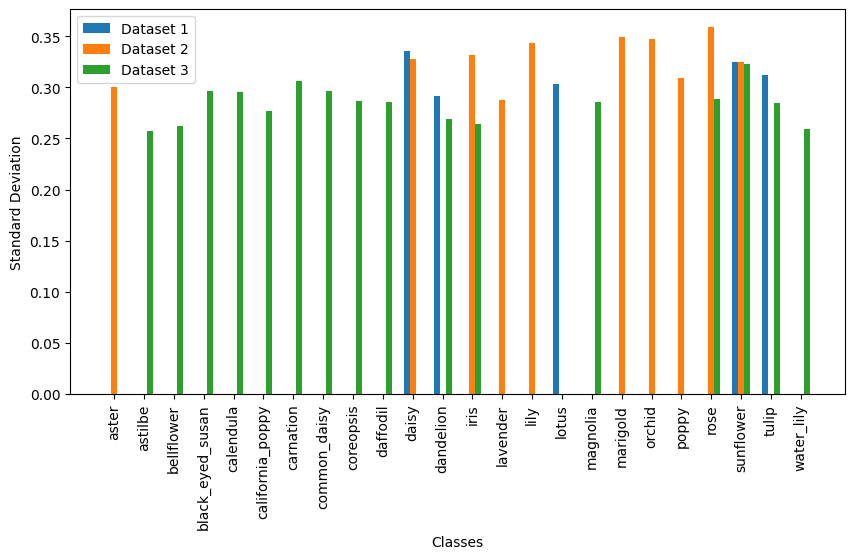

In [59]:
plt.figure(figsize=(10,5))

width = 0.2

r1 = np.arange(len(class_names))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.bar(r1, std_devs1_temp , width, label='Dataset 1')
plt.bar(r2, std_devs2_temp , width, label='Dataset 2')
plt.bar(r3, std_devs3_temp , width, label='Dataset 3')

plt.xlabel('Classes')
plt.ylabel('Standard Deviation')
plt.xticks([r + width for r in range(len(class_names))], class_names)
plt.xticks(rotation=90)


plt.legend()

plt.show()

In [60]:
print(class_names1)
print(std_devs1_temp)
print(class_names2)
print(std_devs2_temp)
print(class_names3)
print(std_devs3_temp)

('aster', 'astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'daisy', 'dandelion', 'iris', 'lavender', 'lily', 'lotus', 'magnolia', 'marigold', 'orchid', 'poppy', 'rose', 'sunflower', 'tulip', 'water_lily')
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.33594972093313497, 0.29158127226179203, 0, 0, 0, 0.30349491535060086, 0, 0, 0, 0, 0, 0.3250910017173099, 0.3118633467438893, 0)
('aster', 'astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'daisy', 'dandelion', 'iris', 'lavender', 'lily', 'lotus', 'magnolia', 'marigold', 'orchid', 'poppy', 'rose', 'sunflower', 'tulip', 'water_lily')
(0.3002144806387412, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3276562716999899, 0, 0.33115911324313574, 0.28707684813481504, 0.3437339878308211, 0, 0, 0.3489909386711186, 0.34703149591203464, 0.30901230234376864, 0.35851930989322506, 0.325088878981679, 0, 0)
('aster', 'astil

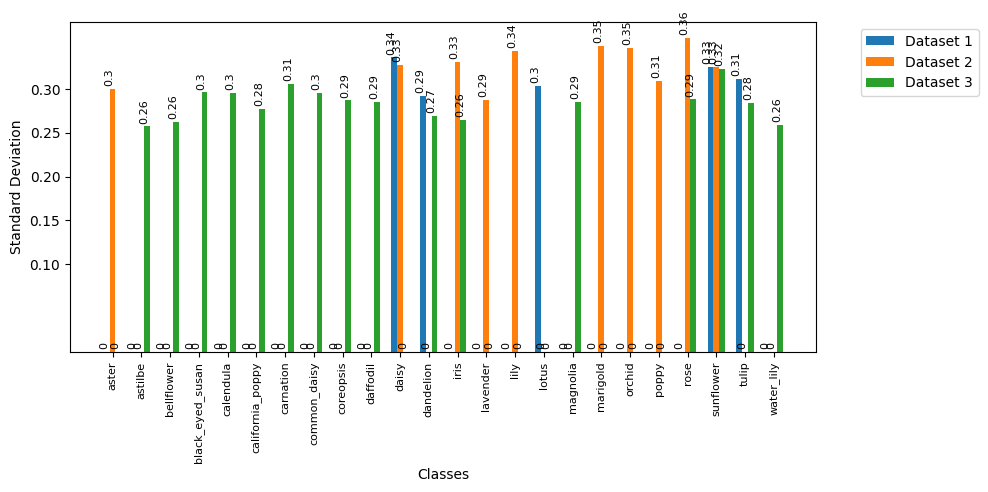

In [61]:
plt.figure(figsize=(10,5))

width = 0.2

r1 = np.arange(len(class_names))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.bar(r1, std_devs1_temp , width, label='Dataset 1')

plt.bar(r2, std_devs2_temp , width, label='Dataset 2')

plt.bar(r3, std_devs3_temp , width, label='Dataset 3')

plt.xlabel('Classes')
plt.ylabel('Standard Deviation')
plt.xticks([r + width for r in range(len(class_names))], class_names, fontsize=8)
plt.xticks(rotation=90)

for i, v in enumerate(std_devs1_temp):
    plt.text(i - 0.1, v + 0.01*max(std_devs1_temp), str(round(v,2)), fontsize=8, rotation=90, va='bottom', ha='center')
for i, v in enumerate(std_devs2_temp):
    plt.text(i + width - 0.1, v + 0.01*max(std_devs2_temp), str(round(v,2)), fontsize=8, rotation=90, va='bottom', ha='center')
for i, v in enumerate(std_devs3_temp):
    plt.text(i + 2*width - 0.1, v + 0.01*max(std_devs3_temp), str(round(v,2)), fontsize=8, rotation=90, va='bottom', ha='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.yticks(np.arange(0.1, max(std_devs3_temp), 0.05))

plt.show()


In [82]:
from PIL import Image
import numpy as np
import os

images= filepaths1
channels = []
for img_file in images:
    img = Image.open(img_file)
    img_arr = np.array(img)
    
    if(img_arr.shape[-1]<=3):
        channels.append(img_arr.shape[-1])

max_channels = max(channels)
min_channels = min(channels)
avg_channels = sum(channels) / len(channels)
print("dataset-1")
print(f"Maximum number of channels: {max_channels}")
print(f"Minimum number of channels: {min_channels}")
print(f"Average number of channels: {avg_channels}")


dataset-1
Maximum number of channels: 3
Minimum number of channels: 3
Average number of channels: 3.0


In [83]:
from PIL import Image
import numpy as np
import os

images= filepaths2
channels = []
for img_file in images:
    img = Image.open(img_file)
    img_arr = np.array(img)
    
    if(img_arr.shape[-1]<=3):
        channels.append(img_arr.shape[-1])

max_channels = max(channels)
min_channels = min(channels)
avg_channels = sum(channels) / len(channels)
print("dataset-2")
print(f"Maximum number of channels: {max_channels}")
print(f"Minimum number of channels: {min_channels}")
print(f"Average number of channels: {avg_channels}")


dataset-2
Maximum number of channels: 3
Minimum number of channels: 3
Average number of channels: 3.0


In [84]:
from PIL import Image
import numpy as np
import os

images= filepaths3
channels = []
for img_file in images:
    img = Image.open(img_file)
    img_arr = np.array(img)
    
    if(img_arr.shape[-1]<=3):
        channels.append(img_arr.shape[-1])

max_channels = max(channels)
min_channels = min(channels)
avg_channels = sum(channels) / len(channels)
print("dataset-3")
print(f"Maximum number of channels: {max_channels}")
print(f"Minimum number of channels: {min_channels}")
print(f"Average number of channels: {avg_channels}")


dataset-3
Maximum number of channels: 3
Minimum number of channels: 3
Average number of channels: 3.0
